## <center>Курсовой проект<a class="anchor" id="course_project"></a><center>

### Постановка задачи<a class="anchor" id="course_project_task"></a>

**Задача**

Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

**Наименование файлов с данными**

course_project_train.csv - обучающий датасет<br>
course_project_test.csv - тестовый датасет

**Целевая переменная**

Credit Default - факт невыполнения кредитных обязательств

**Метрика качества**

F1-score (sklearn.metrics.f1_score)

**Требования к решению**

*Целевая метрика*
* F1 > 0.5
* Метрика оценивается по качеству прогноза для главного класса (1 - просрочка по кредиту)

*Решение должно содержать*
1. Тетрадка Jupyter Notebook с кодом Вашего решения, названная по образцу {ФИО}\_solution.ipynb, пример SShirkin\_solution.ipynb
2. Файл CSV с прогнозами целевой переменной для тестового датасета, названный по образцу {ФИО}\_predictions.csv, пример SShirkin\_predictions.csv

**Описание датасета**

* **Home Ownership** - домовладение
* **Annual Income** - годовой доход
* **Years in current job** - количество лет на текущем месте работы
* **Tax Liens** - налоговые обременения
* **Number of Open Accounts** - количество открытых счетов
* **Years of Credit History** - количество лет кредитной истории
* **Maximum Open Credit** - наибольший открытый кредит
* **Number of Credit Problems** - количество проблем с кредитом
* **Months since last delinquent** - количество месяцев с последней просрочки платежа
* **Bankruptcies** - банкротства
* **Purpose** - цель кредита
* **Term** - срок кредита
* **Current Loan Amount** - текущая сумма кредита
* **Current Credit Balance** - текущий кредитный баланс
* **Monthly Debt** - ежемесячный долг
* **Credit Default** - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

**Библиотеки**

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

pd.options.display.max_columns = 20

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import warnings
warnings.filterwarnings("ignore")

**Пути к директориям и файлам**

In [5]:
train_data = 'E:/GB/course_project_train.csv'
test_data = 'E:/GB/course_project_test.csv'

#### Загрузка данных<a class="anchor" id="load_data"></a>

In [6]:
data = pd.read_csv(train_data)
test = pd.read_csv(test_data)

#### Изучение таблиц данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [15]:
def check_isna(df):
    name_columns = df.columns.values.tolist()
    for n in name_columns:
        if df[n].isna().sum() > 0:
            print(f"столбец '{n}' -  количество пропущенных значений: {df[n].isna().sum()}")

In [16]:
check_isna(data)

столбец 'Annual Income' -  количество пропущенных значений: 1557
столбец 'Years in current job' -  количество пропущенных значений: 371
столбец 'Months since last delinquent' -  количество пропущенных значений: 4081
столбец 'Bankruptcies' -  количество пропущенных значений: 14
столбец 'Credit Score' -  количество пропущенных значений: 1557


In [17]:
check_isna(test)

столбец 'Annual Income' -  количество пропущенных значений: 513
столбец 'Years in current job' -  количество пропущенных значений: 86
столбец 'Months since last delinquent' -  количество пропущенных значений: 1358
столбец 'Bankruptcies' -  количество пропущенных значений: 3
столбец 'Credit Score' -  количество пропущенных значений: 513


In [18]:
data.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [19]:
test.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
count,1.987000e+03,2500.000000,2500.000000,2500.000000,2.500000e+03,2500.000000,1142.000000,2497.000000,2.500000e+03,2.500000e+03,2500.000000,1987.000000
mean,1.366922e+06,0.035200,11.184400,18.325920,7.105704e+05,0.162000,34.181261,0.106928,1.215572e+07,2.963966e+05,18271.340000,1234.516860
std,9.171252e+05,0.386291,4.852774,7.254659,1.511983e+06,0.559894,22.024277,0.357189,3.226097e+07,3.783020e+05,11543.881469,1740.219442
min,1.065330e+05,0.000000,1.000000,3.900000,0.000000e+00,0.000000,0.000000,0.000000,1.542200e+04,0.000000e+00,93.000000,585.000000
25%,8.523115e+05,0.000000,8.000000,13.400000,2.785860e+05,0.000000,16.000000,0.000000,1.871265e+05,1.101145e+05,10024.750000,710.000000
50%,1.178475e+06,0.000000,10.000000,17.000000,4.786760e+05,0.000000,30.000000,0.000000,3.223660e+05,2.073850e+05,16642.500000,731.000000
75%,1.629734e+06,0.000000,14.000000,22.100000,8.025985e+05,0.000000,50.000000,0.000000,5.225825e+05,3.663485e+05,24146.000000,743.000000
max,1.497561e+07,15.000000,48.000000,53.400000,5.448439e+07,15.000000,82.000000,5.000000,1.000000e+08,6.030087e+06,93555.000000,7480.000000


Данные с целевой переменной и тестовые данные идентичны. Количество столблов и столбцы с пропущеными данными совпадают.

### Анилиз данных

#### Annual Income - годовой доход 

In [20]:
data['Annual Income'].min(), data['Annual Income'].max()

(164597.0, 10149344.0)

Выбросов отсутствуют. Min и max годовые доходы вполне реальны.

#### Tax Liens - налоговые обременения
Налог может относиться к имуществу, доходу или штрафам и пеням за неуплату.  

In [21]:
data['Tax Liens'].value_counts()

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64

#### Number of Open Accounts - количество открытых счетов

В таблице data.describe() для данного признака 75% значений составляют значения до 14, а максимальное - 43, что маловероятно. Заменим все, что больше 10 на 10.

In [22]:
data.loc[data['Number of Open Accounts'] > 10, :].shape[0]

3680

#### Years of Credit History - количество лет кредитной истории

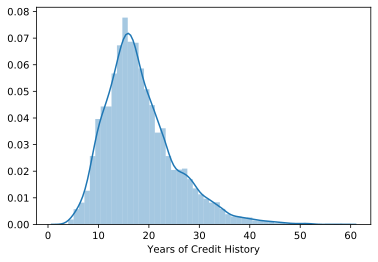

In [23]:
sns.distplot(data['Years of Credit History']);

История после 40 лет можно считать вобросами, т.к. пенсионеры скорее уже проедают нажитое непосильным трудом.

In [24]:
data.loc[data['Years of Credit History'] > 40, :].shape[0]

83

#### Maximum Open Credit - наибольший открытый кредит

Наибольший открытый кредит в пределах 3-х квантилей составляет 793501.5. Пусть наибольший кредит составляет 999 999.

In [25]:
data.loc[data['Maximum Open Credit'] > 999999, :].shape[0]

1190

#### Number of Credit Problems - количество проблем с кредитом

In [26]:
data['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [27]:
data.loc[data['Number of Credit Problems'] > 1, :].shape[0]

149

#### Months since last delinquent - количество месяцев с последней просрочки платежа

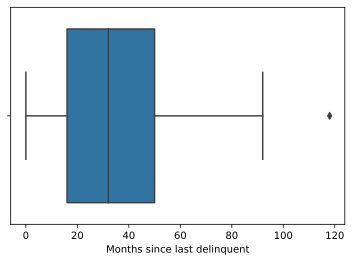

In [28]:
sns.boxplot(data['Months since last delinquent']);

#### Bankruptcies - банкротства

In [29]:
np.sort(data['Bankruptcies'].unique())

array([ 0.,  1.,  2.,  3.,  4., nan])

In [30]:
data['Bankruptcies'].value_counts()

0.0    6660
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64

#### Current Loan Amount - текущая сумма кредита

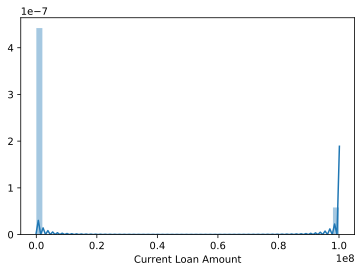

In [31]:
sns.distplot(data['Current Loan Amount']);

In [46]:
data.loc[data['Current Loan Amount'] == 99999999.0].shape[0]

870

In [47]:
data.loc[(data['Current Loan Amount'] == 99999999.0) & (data['Credit Default'] == 0)].shape[0]

870

Цифры огромные. Возможно нужно поработать над ними.

#### Current Credit Balance - текущий кредитный баланс

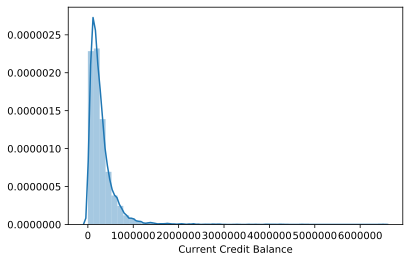

In [35]:
sns.distplot(data['Current Credit Balance']);

In [36]:
data.loc[data['Current Credit Balance'] > 999999].shape[0]

188

#### Monthly Debt - ежемесячный долг

In [37]:
data.loc[data['Monthly Debt'] > 30000, 'Monthly Debt'].shape[0]

1018

#### 'Credit Score' Кредитный рейтинг

https://en.wikipedia.org/wiki/Credit_score. Кредитный рейтинг варьируется от страны к стране. Хороший рейтинг в США - это от 300 до 850 пунктов.

In [38]:
data['Credit Score'].isna().sum()

1557

Пропущенных значений 1557. Заполним их 0, т.к. клиент мог и не брать кредитов.

Значения которые находятся вне диапазона от 300 до 850 меняются на 0.

### Катерогиальные признаки

In [39]:
data['Home Ownership'].unique()

array(['Own Home', 'Home Mortgage', 'Rent', 'Have Mortgage'], dtype=object)

In [40]:
data['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [41]:
data['Years in current job'].unique()

array([nan, '10+ years', '8 years', '6 years', '7 years', '5 years',
       '1 year', '< 1 year', '4 years', '3 years', '2 years', '9 years'],
      dtype=object)

In [42]:
data['Purpose'].unique()

array(['debt consolidation', 'other', 'home improvements', 'take a trip',
       'buy a car', 'small business', 'business loan', 'wedding',
       'educational expenses', 'buy house', 'medical bills', 'moving',
       'major purchase', 'vacation', 'renewable energy'], dtype=object)

In [43]:
data['Term'].unique(), 

(array(['Short Term', 'Long Term'], dtype=object),)

Признаки 'Term', 'Home Ownership' конвертируются в Dummy. Признак 'Years in current job' преобразуются из строк в числа. Признак 'Purpose' приравняем к средним значениям з/п.  

## Обработка пропусков

#### Bankruptcies - банкротства  
меняются на моду.

#### Years in current job - количество лет на текущем месте работы  
меньше года меняется на 0.

In [44]:
data['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

#### Annual Income - годовой доход  
Из-за большого числа пропущенных данных, данный показатель не будет включен в модель, но будет использоваться для обработки  'Purpose'.

#### Months since last delinquent - количество месяцев с последней просрочки платежа
Много пропусков. Меняем на 0.

### Очищение данных и добавление новых признаков

In [48]:
def fillna_data(df):
    df['Credit Score'] = df['Credit Score'].fillna(0)
    df.loc[(df['Credit Score'] < 300) | (df['Credit Score'] > 900), 'Credit Score'] = 0
    df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].mode()[0])
    df['Months since last delinquent'] = df['Months since last delinquent'].fillna(0)
    df['Years in current job'] = df['Years in current job'].fillna(0)
    df.loc[df['Number of Credit Problems'] > 1, 'Number of Credit Problems'] = 1
    df.loc[df['Bankruptcies'] > 1, 'Bankruptcies'] = 1
    return df

def clear_data(sourse_df, df):
    df.loc[df['Tax Liens'] > 1, 'Tax Liens'] = 1
    df.loc[df['Maximum Open Credit'] > 1500000, 'Maximum Open Credit'] = sourse_df['Years of Credit History'].median()
    df.loc[df['Months since last delinquent'] > 100, 'Months since last delinquent'] = sourse_df['Months since last delinquent'].median()
    df.loc[df['Number of Open Accounts'] > 20, 'Number of Open Accounts'] = sourse_df['Number of Open Accounts'].median()
    df.loc[df['Years of Credit History'] > 45, 'Years of Credit History'] = sourse_df['Years of Credit History'].median()
    df.loc[df['Current Credit Balance'] > 1250000, 'Current Credit Balance'] = sourse_df['Current Credit Balance'].median()
    df.loc[df['Monthly Debt'] > 50000, 'Monthly Debt'] = sourse_df['Monthly Debt'].median()
    return df

#### Добавление нового признака для Purpose

In [49]:
def code_mean(sourse_df, df, cat_feature, real_feature, new_feature):
    df[new_feature] = sourse_df[cat_feature].map(df.groupby(cat_feature)[real_feature].mean())
    df[new_feature] = df[new_feature].fillna(0)
    return df

#### Преобразование столбца со стажем

Если человек работает "10+ years", значение меняется на 30.

In [50]:
def convert_years(df):
    for y in df['Years in current job'].unique():
        if y in [0, '< 1 year']:
            df.loc[df['Years in current job'] == y, 'Num Years in current job'] = 0
        elif y == '10+ years':
            df.loc[df['Years in current job'] == y, 'Num Years in current job'] = 30
        else:
            df.loc[df['Years in current job'] == y, 'Num Years in current job'] = int(y.split(' ')[0])
    return df

#### dummy

In [51]:
def conversion_dummy(df, name_colum):
    for cat_colname in name_colum:
        df = pd.concat([df, pd.get_dummies(df[cat_colname], prefix=cat_colname)], axis=1)
    return df


#### Подготовка данных

In [52]:
def prepare_data(sourse_df, df, cat_feature, real_feature, new_feature, name_colum):
    df = fillna_data(df)
    df = clear_data(sourse_df, df)
    df = convert_years(df)
    df = code_mean(sourse_df, df, cat_feature, real_feature, new_feature)
    df = convert_years(df)
    df = conversion_dummy(df, name_colum)
    return df

In [53]:
data = prepare_data(data, data, 'Purpose', 'Annual Income', 'num_purpose', ['Term', 'Home Ownership'])

#### Нормализация данных

In [54]:
from sklearn.preprocessing import StandardScaler

scaling = [
                          'Number of Open Accounts', 
                          'Years of Credit History',
                          'Maximum Open Credit', 
                          'Months since last delinquent', 
                          'Current Loan Amount', 
                          'Current Credit Balance', 
                          'Monthly Debt',
                          'Credit Score', 
                          'num_purpose', 
                           'Num Years in current job']

def normalization_df_train(df_train):
    scaler = StandardScaler()
    df_train[scaling] = scaler.fit_transform(df_train[scaling])
    return df_train

def normalization_df_test(df_train, df_test):
    scaler = StandardScaler()
    df_train[scaling] = scaler.fit_transform(df_train[scaling])
    df_test[scaling] = scaler.transform(df_test[scaling])
    return df_test

### Разбиение на train и test

In [55]:
naming = [                'Number of Open Accounts', 
                          'Years of Credit History',
                          'Maximum Open Credit', 
                          'Number of Credit Problems', 
                          'Months since last delinquent', 
                          'Bankruptcies', 
                          'Current Loan Amount', 
                          'Current Credit Balance', 
                          'Monthly Debt',
                          'Credit Score', 
                          'num_purpose', 
                           'Num Years in current job', 
                          'Term_Long Term', 
                          'Term_Short Term', 
                          'Home Ownership_Have Mortgage', 
                          'Home Ownership_Home Mortgage',
                          'Home Ownership_Own Home', 
                          'Home Ownership_Rent']

In [56]:
focus_name = ['Credit Default']

In [57]:
from sklearn.model_selection import train_test_split

X = data[naming]
y = data[focus_name]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)

### Балансировка классов

In [59]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=150)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train.values.ravel())

from collections import Counter
print(sorted(Counter(y_resampled).items()))

y_train = pd.DataFrame(y_resampled, columns=focus_name)

X_train = pd.DataFrame(X_resampled, columns=naming)

[(0, 3795), (1, 3795)]


### Модель

In [60]:
from sklearn.metrics import f1_score as f1

In [61]:
def _model(df_train, df_valid, y_train, y_valid, model, feats, check_f1='Yes'):
    model.fit(df_train.loc[:, feats], y_train.values.ravel())
    pred_valid = model.predict(df_valid.loc[:, feats])

    if check_f1 == 'Yes':
        f1_ = f1(y_valid, pred_valid)
        print(f'f1: {f1_}')
    return (pred_valid)

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
pred_lr_train = _model(X_train, X_train, y_train, y_train.values.ravel(), lr, naming)
pred_lr_valid = _model(X_train, X_valid, y_train, y_valid.values.ravel(), lr, naming)

f1: 0.572202981478693
f1: 0.48637015781922527


In [64]:
from sklearn.svm import SVC
svc_model = SVC(gamma='scale', C=0.1)
pred_svc_train = _model(X_train, X_train, y_train, y_train.values.ravel(), svc_model, naming)
pred_svc_valid = _model(X_train, X_valid, y_train, y_valid.values.ravel(), svc_model, naming)

f1: 0.7040816326530613
f1: 0.49791903140370786


In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
pred_knn_train = _model(X_train, X_train, y_train, y_train.values.ravel(), knn, naming)
pred_knn_valid = _model(X_train, X_valid, y_train, y_valid.values.ravel(), knn, naming)

f1: 0.8764882742032472
f1: 0.3970223325062035


In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, max_features=3, min_samples_leaf=2)
pred_rf_train = _model(X_train, X_train, y_train, y_train, rf, naming)
pred_rf_valid = _model(X_train, X_valid, y_train, y_valid, rf, naming)

f1: 0.6837541443509308
f1: 0.5371562317144529


In [68]:
from sklearn.model_selection import KFold, RandomizedSearchCV

In [71]:
rf_cv = RandomForestClassifier(n_estimators=500, random_state=42, min_samples_leaf=2)
parameters = { 'n_estimators': [100, 200, 300, 400, 500],
               'max_features': np.arange(3, 9),
               'max_depth': np.arange(3, 9)}
cv = KFold(n_splits=5, random_state=42, shuffle=True)
rs = RandomizedSearchCV(rf_cv, parameters, scoring='f1', cv=cv, n_iter=20, n_jobs=-1)
rs.fit(X_train, y_train.values.ravel())

rs.best_params_, rs.best_score_

({'n_estimators': 500, 'max_features': 8, 'max_depth': 8}, 0.722652999580273)

In [72]:
rf = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=42, max_features=8, min_samples_leaf=2)
pred_rf_train = _model(X_train, X_train, y_train, y_train, rf, naming)
pred_rf_valid = _model(X_train, X_valid, y_train, y_valid, rf, naming)

f1: 0.7619535956928598
f1: 0.527375707992448


Похоже, что модель переобучилась. Попробуем другие параметры

In [73]:
rf = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42, max_features=5, min_samples_leaf=2)
pred_rf_train = _model(X_train, X_train, y_train, y_train, rf, naming)
pred_rf_valid = _model(X_train, X_valid, y_train, y_valid, rf, naming)

f1: 0.6930489528459463
f1: 0.5379557680812912


### Test

In [74]:
def _model_test(df_train, df_test, y_train, model, feats):
    model.fit(df_train.loc[:, feats], y_train.values.ravel())
    pred_valid = model.predict(df_test.loc[:, feats])
    return (pred_valid)

In [75]:
test = prepare_data(data, test, 'Purpose', 'Annual Income', 'num_purpose', ['Term', 'Home Ownership'])

In [76]:
test['Credit Default'] = _model_test(X_train, test, y_train, rf, naming)

In [77]:
test['Id'] = pd.DataFrame(np.arange(7500, 10000))

In [78]:
test['Credit Default'].unique()

array([1, 0], dtype=int64)

In [79]:
test.loc[:, ['Id','Credit Default']].to_csv('E:/GB/ABZyrianov_predictions.csv', index=None)